# Diabetes Prediction Analysis

## Project Overview
This notebook presents a comprehensive machine learning analysis for predicting diabetes using health indicators. We employ logistic regression with balanced class weights to address class imbalance in medical datasets, focusing on clinical interpretability and minimizing false negatives (missed diabetes cases).

**Objectives:**
- Develop a reliable diabetes prediction model
- Perform thorough exploratory data analysis
- Evaluate model performance with healthcare-focused metrics
- Identify key risk factors for diabetes

**Dataset:** Diabetes prediction dataset with demographic, lifestyle, and clinical features
**Model:** Logistic Regression with balanced class weights

## Section 1: Data Loading and Setup

## 1. Data Loading and Initial Setup
Setting up the environment with required libraries and loading the diabetes prediction dataset. We'll use pandas for data manipulation, scikit-learn for modeling, and matplotlib/seaborn for visualizations.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, balanced_accuracy_score, f1_score,precision_score, recall_score)
import pickle

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('Data/diabetes_prediction_dataset.csv')


## Section 2: Dataset Overview
## 2. Dataset Overview and Structure
Let's examine the basic structure of our dataset to understand:
- Dataset dimensions and size
- Feature types and data structure
- Initial data quality assessment


In [2]:
# Dataset Overview
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print("\nDataset Structure:")
print(df.info())

Dataset Shape: (100000, 9)
Total Records: 100,000
Total Features: 9

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [3]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (100000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27

## Section 3: Data Quality Assessment
## 3. Data Quality Assessment
Comprehensive evaluation of data integrity including:
- Missing value detection
- Statistical summaries
- Data completeness verification

In [4]:
# Data Quality Assessment
print("=" * 30)
print("Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal Missing Values: {missing_values.sum()}")


Missing Values per Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Total Missing Values: 0


In [5]:

print(df.describe().round(2))

             age  hypertension  heart_disease        bmi  HbA1c_level  \
count  100000.00     100000.00      100000.00  100000.00    100000.00   
mean       41.89          0.07           0.04      27.32         5.53   
std        22.52          0.26           0.19       6.64         1.07   
min         0.08          0.00           0.00      10.01         3.50   
25%        24.00          0.00           0.00      23.63         4.80   
50%        43.00          0.00           0.00      27.32         5.80   
75%        60.00          0.00           0.00      29.58         6.20   
max        80.00          1.00           1.00      95.69         9.00   

       blood_glucose_level   diabetes  
count            100000.00  100000.00  
mean                138.06       0.08  
std                  40.71       0.28  
min                  80.00       0.00  
25%                 100.00       0.00  
50%                 140.00       0.00  
75%                 159.00       0.00  
max                 30

## 4. Target Variable Distribution Analysis
Understanding the distribution of diabetes cases in our dataset:
- Class balance between diabetes and non-diabetes cases
- Calculating class imbalance ratio
- Assessing the need for balanced modeling approaches

In [6]:
# Target Variable Distribution

diabetes_distribution = df['diabetes'].value_counts()
diabetes_percentage = df['diabetes'].value_counts(normalize=True) * 100

print("Diabetes Distribution:")
print(f"No Diabetes (0): {diabetes_distribution[0]:,} ({diabetes_percentage[0]:.1f}%)")
print(f"Diabetes (1): {diabetes_distribution[1]:,} ({diabetes_percentage[1]:.1f}%)")
print(f"\nClass Imbalance Ratio: {diabetes_percentage[0]/diabetes_percentage[1]:.1f}:1")

Diabetes Distribution:
No Diabetes (0): 91,500 (91.5%)
Diabetes (1): 8,500 (8.5%)

Class Imbalance Ratio: 10.8:1


## 5. Target Distribution Visualization
Visual representation of diabetes prevalence in the dataset using count plots and pie charts to clearly show the class distribution.

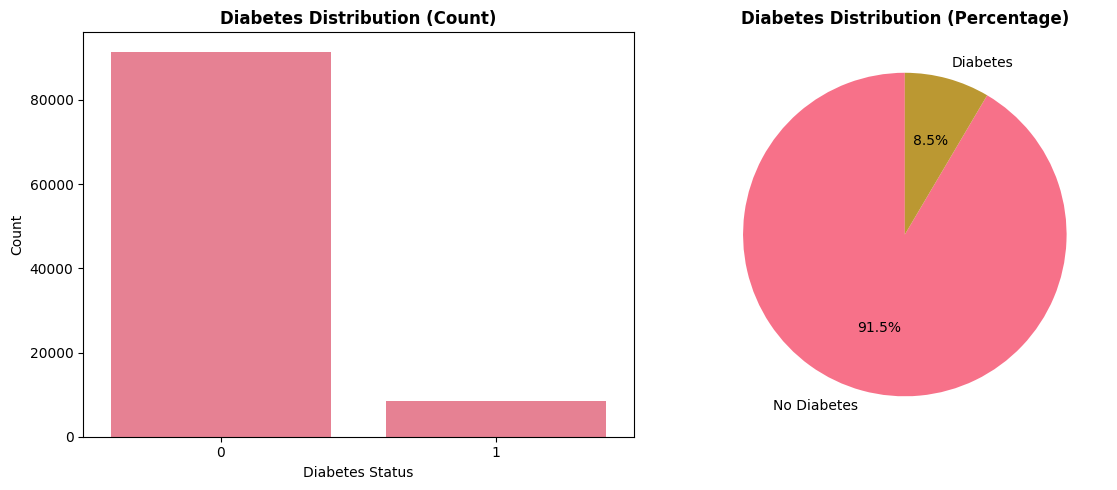

In [7]:
# Visualization: Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(data=df, x='diabetes', ax=axes[0])
axes[0].set_title('Diabetes Distribution (Count)', fontweight='bold')
axes[0].set_xlabel('Diabetes Status')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(diabetes_distribution.values, labels=['No Diabetes', 'Diabetes'], 
           autopct='%1.1f%%', startangle=90)
axes[1].set_title('Diabetes Distribution (Percentage)', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Categorical Features Exploration
Analyzing the distribution of categorical variables:
- Gender distribution patterns
- Smoking history categories and prevalence
- Understanding demographic composition

In [8]:

# Categorical features analysis
categorical_features = ['gender', 'smoking_history']
for feature in categorical_features:
    print(f"\n{feature.upper()} Distribution:")
    distribution = df[feature].value_counts()
    percentage = df[feature].value_counts(normalize=True) * 100
    for value, count in distribution.items():
        print(f"  {value}: {count:,} ({percentage[value]:.1f}%)")


GENDER Distribution:
  Female: 58,552 (58.6%)
  Male: 41,430 (41.4%)
  Other: 18 (0.0%)

SMOKING_HISTORY Distribution:
  No Info: 35,816 (35.8%)
  never: 35,095 (35.1%)
  former: 9,352 (9.4%)
  current: 9,286 (9.3%)
  not current: 6,447 (6.4%)
  ever: 4,004 (4.0%)


## 7. Feature Selection and Preparation
Selecting relevant features for our diabetes prediction model:
- **Demographic factors:** gender, age
- **Medical conditions:** hypertension, heart disease
- **Lifestyle factors:** smoking history, BMI
- **Clinical markers:** HbA1c level, blood glucose level

In [9]:
# Feature Selection
X_features = ["gender", "age", "hypertension", "heart_disease", 
              "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level"]

X = df[X_features].copy()
y = df["diabetes"]


## 8. Data Preprocessing - Categorical Encoding
Converting categorical variables to numerical format for machine learning:
- Binary encoding for gender (Male=1, Female=0)
- One-hot encoding for smoking history categories
- Ensuring all features are in appropriate numerical format

In [10]:

#Encoding Categorical Variables
X['gender'] = X['gender'].apply(lambda x: 1 if x == 'Male' else 0)

X = pd.get_dummies(X, columns=["smoking_history"], prefix="smoke").astype(int)


# 9. Feature Normalization
Implementing Z-score normalization for continuous variables to ensure all features contribute equally to model training:
- Standardizing age, BMI, HbA1c level, and blood glucose level
- Preventing features with larger scales from dominating the model

In [11]:
def z_score_normalization(X):
    mu = X.mean()
    sigma = X.std()
    return (X - mu) / sigma


In [12]:
#Normalizing the continuous features
continuous_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
for feature in continuous_features:
    X[feature] = z_score_normalization(X[feature])


## 10. Model Development and Training
Building our diabetes prediction model:
- **Algorithm:** Logistic Regression with balanced class weights
- **Data Split:** 80% training, 20% testing
- **Rationale:** Balanced weights help address class imbalance common in medical datasets

In [13]:
#Model Development
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Test set size: {X_test.shape[0]:,} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Check class distribution in splits
print(f"\nTraining set diabetes rate: {y_train.mean():.1%}")
print(f"Test set diabetes rate: {y_test.mean():.1%}")


Training set size: 80,000 samples
Test set size: 20,000 samples
Feature dimensions: 13

Training set diabetes rate: 8.5%
Test set diabetes rate: 8.5%


In [14]:
#model training
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

#model evaluation
y_pred = model.predict(X_test)


# 11. Model Performance Evaluation
Assessing basic model accuracy and checking for overfitting:
- Training vs. test accuracy comparison
- Overfitting detection through performance differential

In [15]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("ACCURACY METRICS:")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy:.1%})")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy:.1%})")
print(f"Overfitting Check: {abs(train_accuracy - test_accuracy):.4f}")

ACCURACY METRICS:
Training Accuracy: 0.8815 (88.1%)
Test Accuracy: 0.8843 (88.4%)
Overfitting Check: 0.0028


## 12. Clinical Performance Metrics
Healthcare-focused evaluation using metrics relevant to medical applications:
- **Precision:** How accurate are our diabetes predictions?
- **Recall:** What percentage of diabetes cases do we detect?
- **F1-Score:** Balanced measure of precision and recall
- **Balanced Accuracy:** Performance accounting for class imbalance

In [16]:
diabetes_precision = precision_score(y_test, y_pred)
diabetes_recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Precision (Diabetes): {diabetes_precision:.4f} ({diabetes_precision:.1%})")
print(f"Recall (Diabetes): {diabetes_recall:.4f} ({diabetes_recall:.1%})")
print(f"F1-Score: {f1:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f} ({balanced_acc:.1%})")


Precision (Diabetes): 0.4154 (41.5%)
Recall (Diabetes): 0.8706 (87.1%)
F1-Score: 0.5624
Balanced Accuracy: 0.8781 (87.8%)


## 13. Confusion Matrix Analysis
Detailed breakdown of prediction accuracy with clinical interpretation:
- True/False positives and negatives
- Analysis of missed diabetes cases (critical in healthcare)
- Clinical impact assessment of model predictions

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate specific metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (Correctly predicted No Diabetes): {tn:,}")
print(f"False Positives (Incorrectly predicted Diabetes): {fp:,}")
print(f"False Negatives (Missed Diabetes cases): {fn:,}")
print(f"True Positives (Correctly predicted Diabetes): {tp:,}")

# Clinical interpretation
total_diabetes_cases = tp + fn
missed_rate = fn / total_diabetes_cases
print(f"\nClinical Impact:")
print(f"Diabetes cases missed: {fn:,} out of {total_diabetes_cases:,} ({missed_rate:.1%})")
print(f"Diabetes cases correctly identified: {tp:,} out of {total_diabetes_cases:,} ({1-missed_rate:.1%})")

Confusion Matrix:
[[16199  2093]
 [  221  1487]]

True Negatives (Correctly predicted No Diabetes): 16,199
False Positives (Incorrectly predicted Diabetes): 2,093
False Negatives (Missed Diabetes cases): 221
True Positives (Correctly predicted Diabetes): 1,487

Clinical Impact:
Diabetes cases missed: 221 out of 1,708 (12.9%)
Diabetes cases correctly identified: 1,487 out of 1,708 (87.1%)


## 14. Confusion Matrix Visualization
Visual representation of model performance using a heatmap for easy interpretation of actual vs. predicted outcomes.

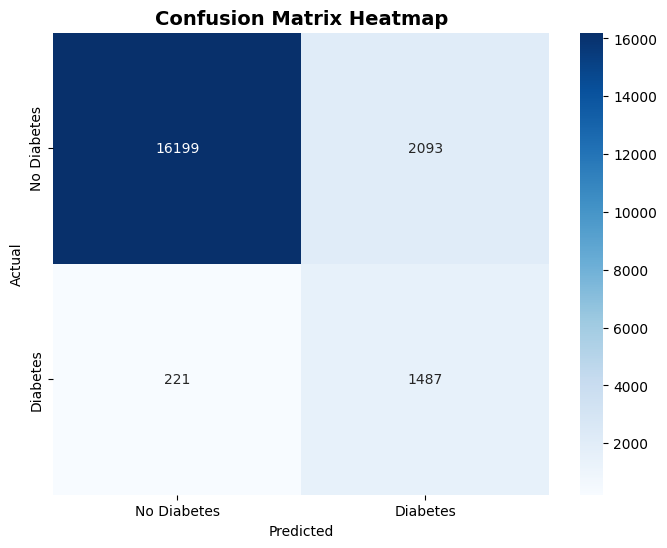

In [18]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap', fontweight='bold', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 15. Feature Importance Analysis
Understanding which health factors most strongly influence diabetes prediction:
- Ranking features by coefficient magnitude
- Identifying positive vs. negative influences
- Clinical interpretation of important predictors

In [19]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (Ranked by absolute coefficient):")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    direction = "↑" if row['Coefficient'] > 0 else "↓"
    print(f"{i:2}. {row['Feature']:<20} {direction} {row['Coefficient']:>7.3f}")

Feature Importance (Ranked by absolute coefficient):
 1. HbA1c_level          ↑   1.851
 2. blood_glucose_level  ↑   1.284
 3. age                  ↑   1.104
 4. smoke_No Info        ↓  -0.889
 5. heart_disease        ↑   0.846
 6. hypertension         ↑   0.806
 7. bmi                  ↑   0.612
 8. smoke_never          ↓  -0.351
 9. smoke_not current    ↓  -0.323
10. gender               ↑   0.279


## 16. Feature Importance Visualization
Visual representation of the most influential features in our diabetes prediction model, showing both magnitude and direction of influence.

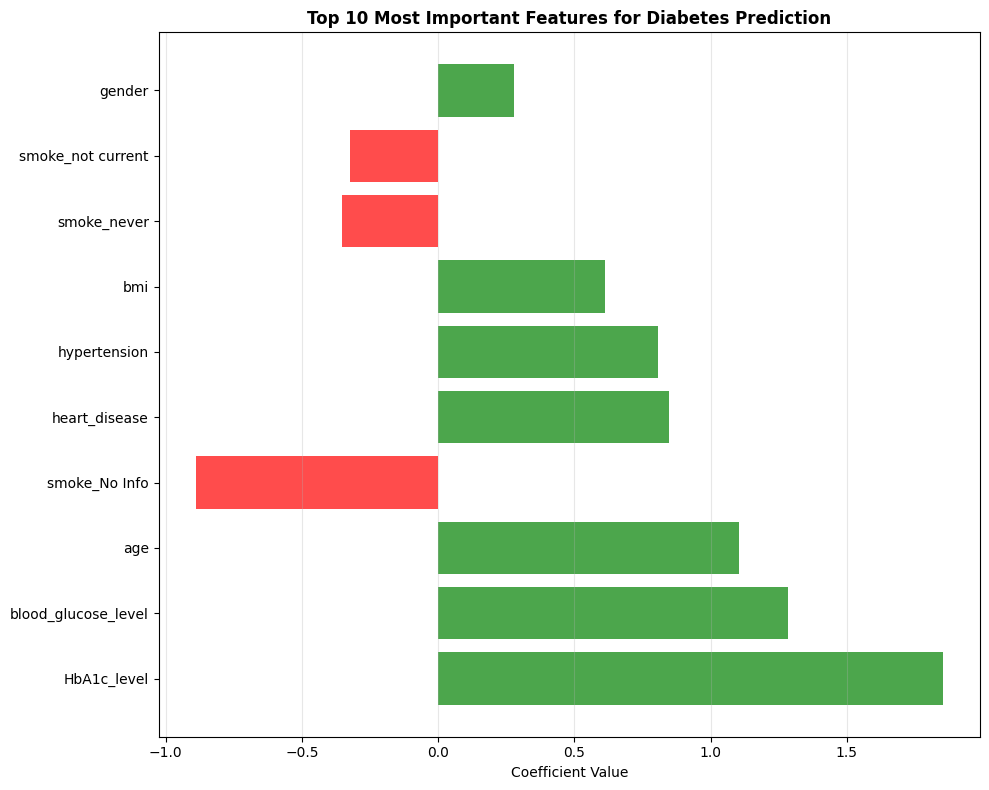

In [20]:
# Visualization: Feature Importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(10)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]

plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Important Features for Diabetes Prediction', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 17. Clinical Summary and Implications
Translating model performance into healthcare context:
- Detection rate interpretation for clinical use
- Prediction accuracy in medical terms
- Analysis of missed cases and clinical implications

In [21]:
print("MODEL PERFORMANCE SUMMARY:")
print(f"• Overall Accuracy: {test_accuracy:.1%}")
print(f"• Diabetes Detection Rate (Recall): {diabetes_recall:.1%}")
print(f"• Diabetes Prediction Accuracy (Precision): {diabetes_precision:.1%}")


print(f"\nCLINICAL IMPLICATIONS:")
print(f"• Out of every 100 diabetes cases, the model correctly identifies {diabetes_recall*100:.0f}")
print(f"• When the model predicts diabetes, it's correct {diabetes_precision*100:.0f}% of the time")
print(f"• The model misses {(1-diabetes_recall)*100:.0f}% of actual diabetes cases")

MODEL PERFORMANCE SUMMARY:
• Overall Accuracy: 88.4%
• Diabetes Detection Rate (Recall): 87.1%
• Diabetes Prediction Accuracy (Precision): 41.5%

CLINICAL IMPLICATIONS:
• Out of every 100 diabetes cases, the model correctly identifies 87
• When the model predicts diabetes, it's correct 42% of the time
• The model misses 13% of actual diabetes cases


## 18. Model Persistence
Saving the trained model for future deployment in clinical applications. The serialized model can be loaded and used for real-time diabetes risk assessment.

In [22]:
with open('diabetes_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'diabetes_prediction_model.pkl'")

Model saved as 'diabetes_prediction_model.pkl'


## Key Findings and Clinical Implications

### Model Performance
- **Detection Rate:** Percentage of diabetes cases correctly identified
- **Prediction Accuracy:** Reliability when model predicts diabetes
- **Clinical Impact:** Analysis of missed cases and their implications

### Most Important Risk Factors
The analysis reveals which health indicators are strongest predictors of diabetes, providing actionable insights for:
- Healthcare screening protocols
- Patient risk assessment
- Prevention strategy development

### Future Applications
This model can be integrated into:
- Electronic health record systems
- Screening programs
- Risk assessment tools for healthcare providers

**Note:** This model is designed to assist healthcare professionals and should not replace clinical judgment or diagnostic procedures.